In [1]:
import numpy as np
import glob
import os
from os import path
import rdkit
from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
# List of the one-letter codes for amino acids
AAs_smileorder=['G','V','v','A','a','N','n','S','s','R','r','D','d','F','f','M','m','H','h',\
                        'I','i','L','l','K','k','T','t','W','w','C','c','Q','q','P','p','Y','y','E','e']
# List of the three-letter codes for amino acids
AA_three_let=['Gly','Val','Val','Ala','Ala','Asn','Asn','Ser','Ser','Arg','Arg','Asp','Asp','Phe','Phe','Met','Met','His','His',\
             'Ile','Ile','Leu','Leu','Lys','Lys','Thr','Thr','Trp','Trp','Cys','Cys','Gln','Gln','Pro','Pro','Tyr','Tyr','Glu','Glu']

# List of SMILES codes for the amino acids listed above
SMILES = []
SMILES.append('C(C(=O)O)N') # Glycine
SMILES.append('CC(C)[C@@H](C(=O)O)N') # L Valine
SMILES.append('CC(C)[C@H](C(=O)O)N') # D Valine
SMILES.append('C[C@@H](C(=O)O)N') # L Alanine
SMILES.append('C[C@H](C(=O)O)N') # D Alanine
SMILES.append('C([C@@H](C(=O)O)N)C(=O)N') # L Asparagine
SMILES.append('C([C@H](C(=O)O)N)C(=O)N') # D Asparagine
SMILES.append('C([C@@H](C(=O)O)N)O') # L Serine
SMILES.append('C([C@H](C(=O)O)N)O') # D Serine
SMILES.append('C(C[C@@H](C(=O)O)N)C[NH+]=C(N)N') # L Arginine
SMILES.append('C(C[C@H](C(=O)O)N)C[NH+]=C(N)N') # D Arginine
SMILES.append('C([C@@H](C(=O)O)N)C(=O)[O-]') # L Aspartic Acid
SMILES.append('C([C@H](C(=O)O)N)C(=O)[O-]') # D Aspartic Acid
SMILES.append('C1=CC=C(C=C1)C[C@@H](C(=O)O)N') # L Phenylalanine
SMILES.append('C1=CC=C(C=C1)C[C@H](C(=O)O)N') # D Phenylalanine
SMILES.append('CSCC[C@@H](C(=O)O)N') #L Methionine
SMILES.append('CSCC[C@H](C(=O)O)N') #D Methionine
SMILES.append('C1=C(NC=N1)C[C@@H](C(=O)O)N') #L Histidine
SMILES.append('C1=C(NC=N1)C[C@H](C(=O)O)N') #D Histidine
SMILES.append('CC[C@H](C)[C@@H](C(=O)O)N') #L Isoleucine
SMILES.append('CC[C@@H](C)[C@H](C(=O)O)N') #D Isoleucine
SMILES.append('CC(C)C[C@@H](C(=O)O)N') #L Leucine
SMILES.append('CC(C)C[C@H](C(=O)O)N') #D Leucine
SMILES.append('C(CC[NH3+])C[C@@H](C(=O)O)N') #L Lysine
SMILES.append('C(CC[NH3+])C[C@H](C(=O)O)N') #D Lysine
SMILES.append('C[C@H]([C@@H](C(=O)O)N)O') #L Threonine
SMILES.append('C[C@@H]([C@H](C(=O)O)N)O') #D Threonine
SMILES.append('C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N') #L Tryptophan
SMILES.append('C1=CC=C2C(=C1)C(=CN2)C[C@H](C(=O)O)N') #D Tryptophan
SMILES.append('C([C@@H](C(=O)O)N)S') #L Cysteine
SMILES.append('C([C@H](C(=O)O)N)S') #D Cysteine
SMILES.append('C(CC(=O)N)[C@@H](C(=O)O)N') #L Glutamine
SMILES.append('C(CC(=O)N)[C@H](C(=O)O)N') #D Glutamine
SMILES.append('C1C[C@H](NC1)C(=O)O') #L Proline
SMILES.append('C1C[C@@H](NC1)C(=O)O') #D Proline
SMILES.append('C1=CC(=CC=C1C[C@@H](C(=O)O)N)O') #L Tyrosine
SMILES.append('C1=CC(=CC=C1C[C@H](C(=O)O)N)O') #D Tyrosine
SMILES.append('C(CC(=O)[O-])[C@@H](C(=O)O)N') #L Glutamic Acid
SMILES.append('C(CC(=O)[O-])[C@H](C(=O)O)N') #D Glutamic Acid

aa_fingerprint = []

In [3]:
#Have RDKit read the SMILES codes and generate Mol objects and label the atoms with an index.
all_mols=[] # list of Mol object
for i,code in enumerate(SMILES): 
    bi={} #bi is information stored as (atom, radius)
    m1=Chem.MolFromSmiles(code)
    for j,atom in enumerate(m1.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number,
    # let's say, the index of the atom in the molecule
        atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    m1.SetProp("name", str(AAs_smileorder[i]))
        
    all_mols.append(m1)

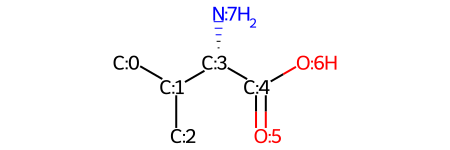

In [4]:
# Example display of L-Valine
all_mols[1]

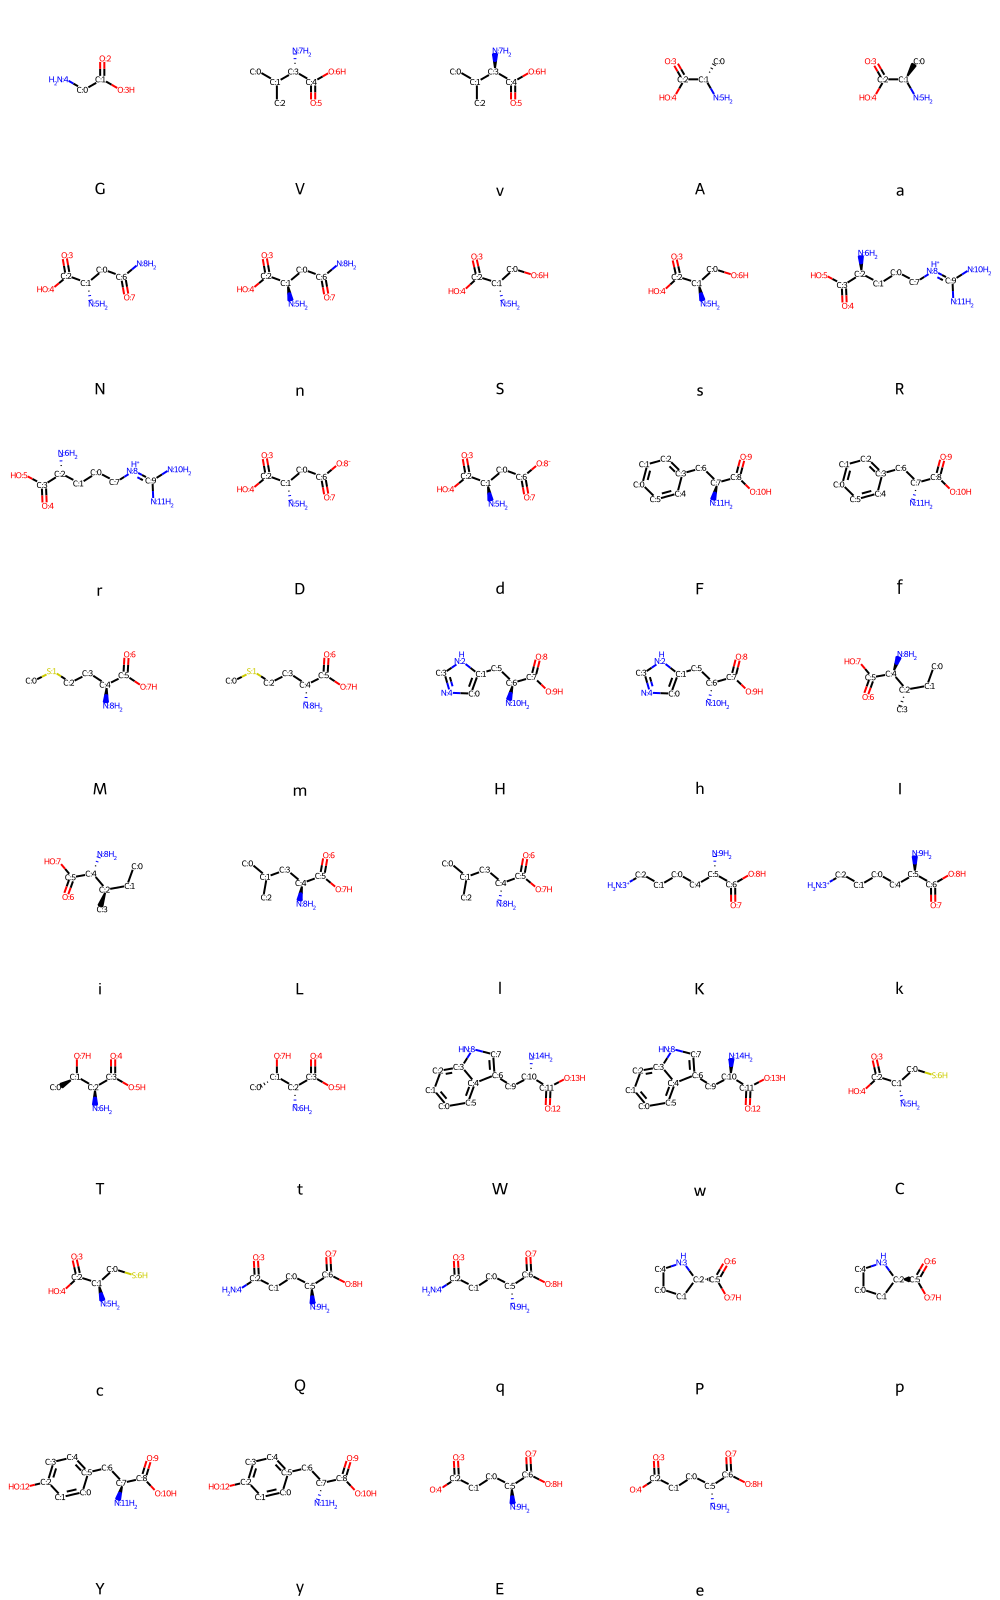

In [5]:
# Display all the amino acids with their atom index labels
grid_image = Draw.MolsToGridImage(all_mols, molsPerRow=5,legends=[mol.GetProp("name") for mol in all_mols])
grid_image

In [6]:
# Carefully identify and record in the list "heavy_atoms_list_coupled"
# the heavy atoms for the "side-chain" walk starting from C-alpha, using all
# the heavy atoms (minus 1) for each amino acid.

# For example, the amino acid L-Valine's "side-chain" walk starts with C-alpha (atom index 3), 
# to C-beta (atom index 1), and then C-gammas (atom indices 0 and 2). 
# Thus, the entry in the list for L-Valine would be [3,1] becuase we excluded the "last/furthest" atom(s) 

#Note that some entries have nested brackets to indicate that there are heavy atoms in the same position.
# For example, L-Phenylalanine's entry is [7,6,3,[2,4] because
# C-alpha is index 7, C-beta is 6, C-gamma is 3, C-deltas are 2 and 4, and C-epsilons are 1 and 5.

heavy_atoms_list_coupled=[[0],[3,1],[3,1],[1],[1],[1,0,6],[1,0,6],[1,0],[1,0],[2,1,0,7,8,9],[2,1,0,7,8,9],\
                 [1,0,6],[1,0,6],[7,6,3,[2,4],[1,5]],[7,6,3,[2,4],[1,5]],[4,3,2,1],[4,3,2,1],[6,5,1,[0,2]],\
                 [6,5,1,[0,2]],[4,2,1],[4,2,1],[4,3,1],[4,3,1],[5,4,0,1,2],[5,4,0,1,2],[2,1],[2,1],\
                 [10,9,6,[4,7],[5,3,8],[0,2]],[10,9,6,[4,7],[5,3,8],[0,2]],[1,2],[1,2],[5,0,1,2],[5,0,1,2],\
                 [5],[5],[7,6,5,[0,4],[3,1],2],[7,6,5,[0,4],[3,1],2],[5,0,1,2],[5,0,1,2]]

In [7]:
#Generate the PASC encoding
num_bits=1024
coupled_list=['F','f','H','h','Y','y','W','w'] # List the amino acids that have heavy atoms in the same position (nested brackets)
total_aa_vec=[]
all_bits=[]
all_values=[]

for i,aa in enumerate(AAs_smileorder):
    per_aa_vec=[]
    m1=Chem.MolFromSmiles(SMILES[i]) # for each amino acid, again create a mol object
    for j in range(len(heavy_atoms_list_coupled[i])): #loop over for each heavy atom in the side chain walk
        #define initially empty fingerprint arrays (up to 3 in the case if there are 3 heavy atoms with the same position)
        bi={}
        bi2={}
        bi3={}
        fp1=[]
        fp2=[]
        fp3=[]
        temp_total_list=[]
        
        if aa not in coupled_list: #just check if the atom is within an amino acid that contains heavy atoms in the same position.
            #if not, then generate the radius=1 morgan fingerprint centered at that atom
            fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j]],\
                                             useChirality=True,bitInfo=bi)
            all_bits.append(list(bi.keys())) 
            all_values.append(list(bi.values()))
            vector1 = np.array(fp1)
            #if the atom shares the same position as another atom, we generate a fingerprint for each atom and take their average
        elif aa in coupled_list:
            if type(heavy_atoms_list_coupled[i][j])==list:
                if len(heavy_atoms_list_coupled[i][j])==2:
                    fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j][0]],\
                                                 useChirality=True,bitInfo=bi)
                    fp2 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j][1]],\
                                                 useChirality=True,bitInfo=bi2)
                    
                    temp_total_list=list(list(bi.keys())+list(bi2.keys()))
                    all_bits.append(temp_total_list) 
                    temp_total_list_vals=list(list(bi.values())+list(bi2.values()))
                    all_values.append(temp_total_list_vals) 
                    vector1 = np.mean(np.array([ np.array(fp1), np.array(fp2) ]),axis=0)
                    
                if len(heavy_atoms_list_coupled[i][j])>2:
                    fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j][0]],\
                                                 useChirality=True,bitInfo=bi)
                    fp2 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j][1]],\
                                                 useChirality=True,bitInfo=bi2)
                    fp3 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j][2]],\
                                                 useChirality=True,bitInfo=bi3)
                    
                    temp_total_list=list(list(bi.keys())+list(bi2.keys())+list(bi3.keys()))
                    all_bits.append(temp_total_list) 
                    temp_total_list_vals=list(list(bi.values())+list(bi2.values())+list(bi3.values()))
                    all_values.append(temp_total_list_vals)                   
                    vector1 = np.mean(np.array([ np.array(fp1), np.array(fp2),np.array(fp3) ]),axis=0)
                
            elif type(heavy_atoms_list_coupled[i][j])==int:
                fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled[i][j]],\
                                             useChirality=True,bitInfo=bi)
                all_bits.append(list(bi.keys())) 
                all_values.append(list(bi.values()))
                vector1 = np.array(fp1)
            
        per_aa_vec.append(vector1)
    total_aa_vec.append(per_aa_vec)

In [8]:
# save the features in numpy files
all_numpys=[]
len_of_longest_aa_in_lib=9
zero_arr=np.zeros([num_bits])
for i,aa in enumerate(AAs_smileorder):
    new_aa_vec=total_aa_vec[i].copy()
    while len(new_aa_vec)<len_of_longest_aa_in_lib: #pad with zeros
        new_aa_vec.append(zero_arr)
    flattened_vec_list=[item for sublist in new_aa_vec for item in sublist]
    all_numpys.append(flattened_vec_list)
    if aa.islower():
        np.save('numpys/'+AA_three_let[i]+'_D_'+str(num_bits)+'_0604.npy',np.array(flattened_vec_list))
    elif aa.isupper():
        np.save('numpys/'+AA_three_let[i]+'_L_'+str(num_bits)+'_0604.npy',np.array(flattened_vec_list))

In [9]:
# do the same process for NCAAs

In [10]:
NCAAs_smileorder=[]
NCAAs_smileorder=['J','j','1','B','b','O','o','Z','z','U','u','X','x']

NCAAs_three_let=['GML','GML','AIB','BFA','BFA','NAL','NAL','F4C','F4C','HSE','HSE','PCF','PCF']
NCAAs_SMILES = []
NCAA_fingerprint = []

NCAAs_SMILES.append('N[C@H](C(O)=O)(CC(C)(C)(C))') #L GML
NCAAs_SMILES.append('N[C@@H](C(O)=O)(CC(C)(C)(C))') #D GML
NCAAs_SMILES.append('N[C](C(O)=O)(C)(C)') # AIB
NCAAs_SMILES.append('N[C@H](C(O)=O)(Cc1ccc(cc1)c1ccccc1)') #L BFA
NCAAs_SMILES.append('N[C@@H](C(O)=O)(Cc1ccc(cc1)c1ccccc1)') #D BFA
NCAAs_SMILES.append('N[C@H](C(O)=O)(CC1=CC2=CC=CC=C2C=C1)') #L NAL
NCAAs_SMILES.append('N[C@@H](C(O)=O)(CC1=CC2=CC=CC=C2C=C1)') #D NAL
NCAAs_SMILES.append('N[C@H](C(O)=O)(Cc1ccc(C(=O)N)cc1)') #L F4C
NCAAs_SMILES.append('N[C@@H](C(O)=O)(Cc1ccc(C(=O)N)cc1)') #D F4C
NCAAs_SMILES.append('N[C@H](C(O)=O)(CCO)') #L HSE
NCAAs_SMILES.append('N[C@@H](C(O)=O)(CCO)') #D HSE
NCAAs_SMILES.append('N[C@H](C(O)=O)(Cc1ccc(Cl)cc1)') #L PCF
NCAAs_SMILES.append('N[C@@H](C(O)=O)(Cc1ccc(Cl)cc1)') #D PCF


#Have RDKit read the SMILES codes and generate Mol objects and label the atoms with an index.
all_mols_ncaa=[] # list of Mol object
for i,code in enumerate(NCAAs_SMILES): 
    bi={} #bi is information stored as (atom, radius)
    m1=Chem.MolFromSmiles(code)
    for j,atom in enumerate(m1.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number,
    # let's say, the index of the atom in the molecule
        atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    m1.SetProp("name", str(NCAAs_smileorder[i]))
        
    all_mols_ncaa.append(m1)

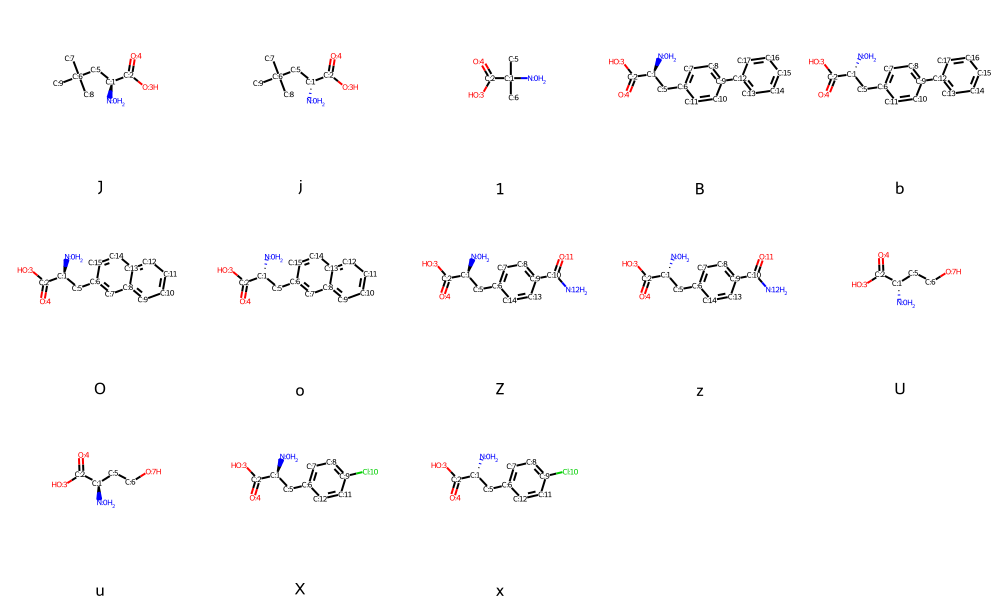

In [11]:
# Display all the amino acids with their atom index labels
grid_image_ncaa = Draw.MolsToGridImage(all_mols_ncaa, molsPerRow=5,legends=[mol.GetProp("name") for mol in all_mols_ncaa])
grid_image_ncaa

In [12]:
heavy_atoms_list_coupled_ncaa=[[1,5,6],[1,5,6],[1],\
                          [1,5,6,[7,11],[8,10],9,12,[13,17],[16,15]],[1,5,6,[7,11],[8,10],9,12,[13,17],[16,15]],\
                          [1,5,6,[15,7],[14,8],[13,9],[12,10]],[1,5,6,[15,7],[14,8],[13,9],[12,10]],
                          [1,5,6,[7,14],[8,13],9,10],[1,5,6,[7,14],[8,13],9,10],\
                          [1,5,6],[1,5,6],[1,5,6,[7,12],[8,11],9],[1,5,6,[7,12],[8,11],9]]

In [13]:
#Generate the PASC encoding

ncaa_coupled_list=['B','b','O','o','Z','z','X','x'] # List the amino acids that have heavy atoms in the same position (nested brackets)
ncaa_total_aa_vec=[]
ncaa_all_bits=[]
ncaa_all_values=[]

for i,aa in enumerate(NCAAs_smileorder):
    per_aa_vec=[]
    m1=Chem.MolFromSmiles(NCAAs_SMILES[i]) # for each amino acid, again create a mol object
    for j in range(len(heavy_atoms_list_coupled_ncaa[i])): #loop over for each heavy atom in the side chain walk
        #define initially empty fingerprint arrays (up to 3 in the case if there are 3 heavy atoms with the same position)
        bi={}
        bi2={}
        bi3={}
        fp1=[]
        fp2=[]
        fp3=[]
        temp_total_list=[]
        
        if aa not in ncaa_coupled_list: #just check if the atom is within an amino acid that contains heavy atoms in the same position.
            #if not, then generate the radius=1 morgan fingerprint centered at that atom
            fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j]],\
                                             useChirality=True,bitInfo=bi)
            ncaa_all_bits.append(list(bi.keys())) 
            ncaa_all_values.append(list(bi.values()))
            vector1 = np.array(fp1)
            #if the atom shares the same position as another atom, we generate a fingerprint for each atom and take their average
        elif aa in ncaa_coupled_list:
            if type(heavy_atoms_list_coupled_ncaa[i][j])==list:
                if len(heavy_atoms_list_coupled_ncaa[i][j])==2:
                    fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j][0]],\
                                                 useChirality=True,bitInfo=bi)
                    fp2 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j][1]],\
                                                 useChirality=True,bitInfo=bi2)
                    
                    temp_total_list=list(list(bi.keys())+list(bi2.keys()))
                    ncaa_all_bits.append(temp_total_list) 
                    temp_total_list_vals=list(list(bi.values())+list(bi2.values()))
                    ncaa_all_values.append(temp_total_list_vals) 
                    vector1 = np.mean(np.array([ np.array(fp1), np.array(fp2) ]),axis=0)
                    
                if len(heavy_atoms_list_coupled_ncaa[i][j])>2:
                    fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j][0]],\
                                                 useChirality=True,bitInfo=bi)
                    fp2 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j][1]],\
                                                 useChirality=True,bitInfo=bi2)
                    fp3 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j][2]],\
                                                 useChirality=True,bitInfo=bi3)
                    
                    temp_total_list=list(list(bi.keys())+list(bi2.keys())+list(bi3.keys()))
                    ncaa_all_bits.append(temp_total_list) 
                    temp_total_list_vals=list(list(bi.values())+list(bi2.values())+list(bi3.values()))
                    ncaa_all_values.append(temp_total_list_vals)                   
                    vector1 = np.mean(np.array([ np.array(fp1), np.array(fp2),np.array(fp3) ]),axis=0)
                
            elif type(heavy_atoms_list_coupled_ncaa[i][j])==int:
                fp1 = Chem.GetMorganFingerprintAsBitVect(m1,1,nBits=num_bits,fromAtoms=[heavy_atoms_list_coupled_ncaa[i][j]],\
                                             useChirality=True,bitInfo=bi)
                ncaa_all_bits.append(list(bi.keys())) 
                ncaa_all_values.append(list(bi.values()))
                vector1 = np.array(fp1)
            
        per_aa_vec.append(vector1)
    ncaa_total_aa_vec.append(per_aa_vec)

In [14]:
# save the features in numpy files
ncaa_all_numpys=[]
len_of_longest_aa_in_lib=9
zero_arr=np.zeros([num_bits])
for i,aa in enumerate(NCAAs_smileorder):
    new_aa_vec=ncaa_total_aa_vec[i].copy()
    while len(new_aa_vec)<len_of_longest_aa_in_lib: #pad with zeros
        new_aa_vec.append(zero_arr)
    flattened_vec_list=[item for sublist in new_aa_vec for item in sublist]
    ncaa_all_numpys.append(flattened_vec_list)
    if aa.islower():
        np.save('numpys/'+NCAAs_three_let[i]+'_D_'+str(num_bits)+'_0604.npy',np.array(flattened_vec_list))
    elif aa.isupper() or aa=='1': #the identifier for AIB is 1
        np.save('numpys/'+NCAAs_three_let[i]+'_L_'+str(num_bits)+'_0604.npy',np.array(flattened_vec_list))